## Project 1 : Data Science Blog Post

## Data : Startup Funding in India

In [258]:
# import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

## Data Understanding

### This project uses the funding information of Indian Startups from January 2015 to August 2017

In [259]:
# Loading and understanding the dataset
startup_funding = pd.read_csv('./startup_funding.csv')
startup_funding.head()

,Sr No,Date ddmmyyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,Investment Type,Amount in USD,Remarks
0,0,5/9/2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,"4,500,000",NaN
1,1,4/9/2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,"3,300,000",NaN
2,2,4/9/2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,"6,000,000",NaN
3,3,4/9/2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,"5,000,000",NaN
4,4,4/9/2019,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,"18,000,000",NaN


In [260]:
# Get the basic information about the project
startup_funding.describe()

,Sr No
count,3009.000000
mean,1526.737454
std,884.509003
min,0.000000
25%,756.000000
50%,1530.000000
75%,2292.000000
max,3057.000000


In [261]:
# Get the data types for different columns
startup_funding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 10 columns):
Sr No                3009 non-null int64
Date ddmmyyyy        3009 non-null object
Startup Name         3009 non-null object
Industry Vertical    2838 non-null object
SubVertical          2073 non-null object
City  Location       2829 non-null object
Investors Name       2986 non-null object
Investment Type      3006 non-null object
Amount in USD        2045 non-null object
Remarks              419 non-null object
dtypes: int64(1), object(9)
memory usage: 235.2+ KB


In [262]:
# Get the number of columns and rows
no_rows = startup_funding.shape[0]
no_columns = startup_funding.shape[1]
print("Number of rows : {}".format(no_rows))
print("Number of columns : {}".format(no_columns))

Number of rows : 3009
Number of columns : 10


In [263]:
# Display all column names in the dataset
startup_funding.columns

Index(['Sr No', 'Date ddmmyyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'Investment Type',
       'Amount in USD', 'Remarks'],
      dtype='object')

### Data Preparation:

Data Preprocessing Steps that need to be done before analyzing data:

i. Checking columns with missing values and analyze impact <br>
ii. Devise a strategy to deal with missing values <br>
iii. If more than 75% values are missing then drop that column, else numerical variables can be imputed by mean and categorical variables by mode <br>
iii. One-hot coding for all categorical variables <br>

In [264]:
startup_funding.isnull().sum()

Sr No                   0
Date ddmmyyyy           0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         23
Investment Type         3
Amount in USD         964
Remarks              2590
dtype: int64

In [265]:
# Drop columns that have maximum missing values
startup_new = set(startup_funding.columns[startup_funding.isnull().mean() > 0.75])
print("Column with more than 75% values missing", startup_new)

startup_funding = startup_funding.drop('Remarks', axis = 1, inplace = False)

print("Column {} removed".format(startup_new))

Column with more than 75% values missing {'Remarks'}
Column {'Remarks'} removed


In [266]:



# Standarize all city names
startup_ab = startup_funding.replace(["Bengaluru", "Delhi", "Kolkatta", "Ahemadabad"], ["Bangalore", "New Delhi", "Kolkata", "Ahmedabad"])

# Standarize all Industry names
startup_bc  = startup_ab.replace(["eCommerce", "E-Commerce", "ECommerce", "Ecommerce", "Fin-Tech", "Food and Beverage"], ["E-commerce", "E-commerce", "E-commerce", "E-commerce",  "FinTech", "Food & Beverage" ])

# Standardize amount
startup_lat = startup_bc.replace(["undisclosed", "Undisclosed"],[np.nan,np.nan])

startup_lat['Amount in USD'] = startup_lat['Amount in USD'].str.replace(',','')
startup_lat['Amount in USD'] = startup_lat['Amount in USD'].astype(float)


startup_lat.head(30)
export_csv = startup_lat.to_csv(r'C:\Users\aniyo\Desktop\ani.csv', index = None, header = True)

In [267]:
startup_lat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 9 columns):
Sr No                3009 non-null int64
Date ddmmyyyy        3009 non-null object
Startup Name         3009 non-null object
Industry Vertical    2838 non-null object
SubVertical          2073 non-null object
City  Location       2829 non-null object
Investors Name       2975 non-null object
Investment Type      3006 non-null object
Amount in USD        2040 non-null float64
dtypes: float64(1), int64(1), object(7)
memory usage: 211.6+ KB


In [268]:
# Imputing all other missing values

# Function to impute a column with its mean
fill_mean = lambda col: col.fillna(col.mean())

# Impute numerical variables with its mean
startup_lat[['Amount in USD']] = startup_lat[['Amount in USD']].apply(fill_mean, axis = 0)

# Function to impute a column with its mode
fill_mode = lambda col: col.fillna(col.mode()[0])

# Impute other categorical variables with mode
startup_lat[["Industry Vertical", "SubVertical", "City  Location", "Investors Name", "Investment Type"]] = startup_lat[["Industry Vertical", "SubVertical", "City  Location", "Investors Name", "Investment Type"]].apply(fill_mode, axis = 0)

In [269]:
startup_lat.head()

,Sr No,Date ddmmyyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,Investment Type,Amount in USD
0,0,5/9/2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,4500000.0
1,1,4/9/2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,3300000.0
2,2,4/9/2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,6000000.0
3,3,4/9/2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,5000000.0
4,4,4/9/2019,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,18000000.0


In [278]:
# One hot encoding for all categorical variables

le = LabelEncoder()
startup_lat['Industry_Vertical_OHE'] = le.fit_transform(startup_lat['Industry Vertical'].astype(str))
startup_lat['SubVertical_OHE'] = le.fit_transform(startup_lat['SubVertical'].astype(str))
startup_lat['City_Location_OHE'] = le.fit_transform(startup_lat['City  Location'].astype(str))
startup_lat['Investors_Name_OHE'] = le.fit_transform(startup_lat['Investors Name'].astype(str))
startup_lat['Investment_Type_OHE'] = le.fit_transform(startup_lat['Investment Type'].astype(str))
startup_lat['Date_ddmmyyyy_OHE'] = le.fit_transform(startup_lat['Date ddmmyyyy'].astype(str))
startup_lat['Startup_Name_OHE'] = le.fit_transform(startup_lat['Startup Name'].astype(str))
startup_lat['Investment_Type_OHE'] = le.fit_transform(startup_lat['Investment Type'].astype(str))



In [279]:
startup_lat.head()

,Sr No,Date ddmmyyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,Investment Type,Amount in USD,Industry_Vertical_OHE,SubVertical_OHE,City_Location_OHE,Investors_Name_OHE,Investment_Type_OHE,Date_ddmmyyyy_OHE,Startup_Name_OHE
0,0,5/9/2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,4500000.0,227,559,75,1240,15,873,611
1,1,4/9/2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,3300000.0,227,792,56,1714,35,835,320
2,2,4/9/2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,6000000.0,7,411,56,2029,21,835,497
3,3,4/9/2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,5000000.0,661,470,35,602,49,835,12
4,4,4/9/2019,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,18000000.0,354,183,16,398,35,835,17


## Answering Questions of Interest:


Bangalore     1013
Mumbai         565
New Delhi      456
Gurgaon        281
Pune           103
Hyderabad       99
Chennai         96
Noida           91
Gurugram        50
Ahmedabad       40
Jaipur          30
Kolkata         22
Indore          13
Chandigarh      11
Vadodara        10
Name: City  Location, dtype: int64


Text(0.5, 1.0, 'Top 20 cities with most number of startups that got funding')

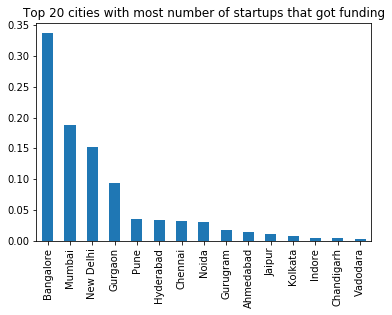

In [276]:
# Question 1
# Do cities have a huge influence in funding?

# Provide a pandas dataframe with the number of startups for each city
city_count = startup_lat["City  Location"].value_counts()

# Printing only the top twenty cities
print(city_count.head(15))

# Plotting a bar graph
(city_count.head(15)/startup_lat.shape[0]).plot(kind="bar");
plt.title("Top 20 cities with most number of startups that got funding")

Consumer Internet            1112
Technology                    476
E-commerce                    291
Healthcare                     69
Finance                        61
Logistics                      31
Food & Beverage                28
Education                      22
Ed-Tech                        14
FinTech                        12
IT                              8
Real Estate                     6
Others                          6
Logistics Tech                  5
Online Education Platform       5
Name: Industry Vertical, dtype: int64


Text(0.5, 1.0, ' Industries with more number of startups')

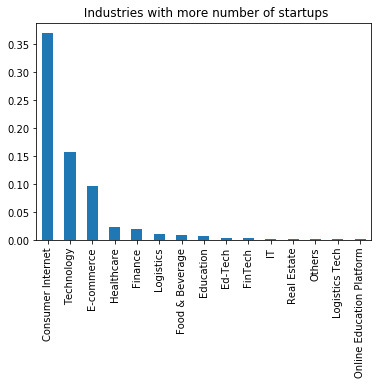

In [274]:
# Question 2
# Which industries are more favored by investors?
industry_count = startup_lat['Industry Vertical'].value_counts()

# Printing only the top 15 cities
print(industry_count.head(15))

# Plotting a bar graph
(industry_count.head(15)/startup_lat.shape[0]).plot(kind = "bar");
plt.title(" Industries with more number of startups")

Text(0.5, 1.0, 'Most prominent investors in India')

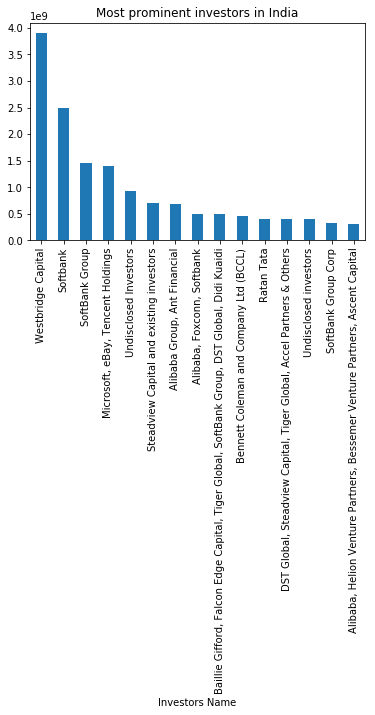

In [277]:
# Question 3
# Who are the most prominent investors in Indian Startup Environment?

startup_lat.groupby("Investors Name")["Amount in USD"].sum().sort_values(ascending = False).head(15).plot(kind="bar");
plt.title("Most prominent investors in India")

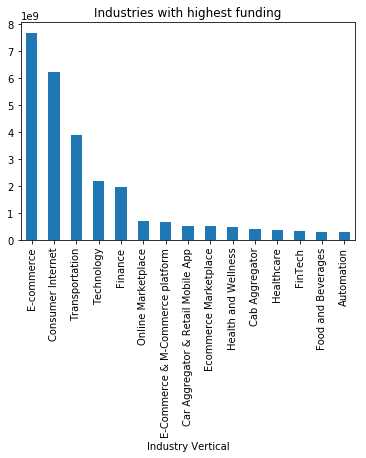

In [254]:
# Question 4
# Which Industries got the most funding?
startup_lat.groupby("Industry Vertical")['Amount in USD'].sum().sort_values(ascending=False).head(15).plot(kind="bar");
plt.title("Industries with highest funding");

In [280]:
# Question 5
# Correlation between Date ddmmyyyy, Startup Name, Industry Vertical, SubVertical, City  Location, Investors Name, Investment Type, Amount in USD     

correlation_DF = startup_lat[['Date_ddmmyyyy_OHE', 'Startup_Name_OHE', 'Industry_Vertical_OHE', 'SubVertical_OHE', 'City_Location_OHE', 'Investors_Name_OHE', 'Investment_Type_OHE','Amount in USD']]

correlation_DF.corr()

,Date_ddmmyyyy_OHE,Startup_Name_OHE,Industry_Vertical_OHE,SubVertical_OHE,City_Location_OHE,Investors_Name_OHE,Investment_Type_OHE,Amount in USD
Date_ddmmyyyy_OHE,1.000000,0.012936,0.003804,-0.006520,0.012753,-0.022137,-0.017886,-0.009427
Startup_Name_OHE,0.012936,1.000000,0.013059,0.008669,-0.028846,-0.003557,0.001375,-0.003662
Industry_Vertical_OHE,0.003804,0.013059,1.000000,-0.086173,0.058271,-0.004877,-0.010923,-0.004216
SubVertical_OHE,-0.006520,0.008669,-0.086173,1.000000,-0.035024,0.022525,-0.005879,-0.033977
City_Location_OHE,0.012753,-0.028846,0.058271,-0.035024,1.000000,0.018508,0.030056,-0.039666
Investors_Name_OHE,-0.022137,-0.003557,-0.004877,0.022525,0.018508,1.000000,0.045504,0.031450
Investment_Type_OHE,-0.017886,0.001375,-0.010923,-0.005879,0.030056,0.045504,1.000000,-0.012335
Amount in USD,-0.009427,-0.003662,-0.004216,-0.033977,-0.039666,0.031450,-0.012335,1.000000


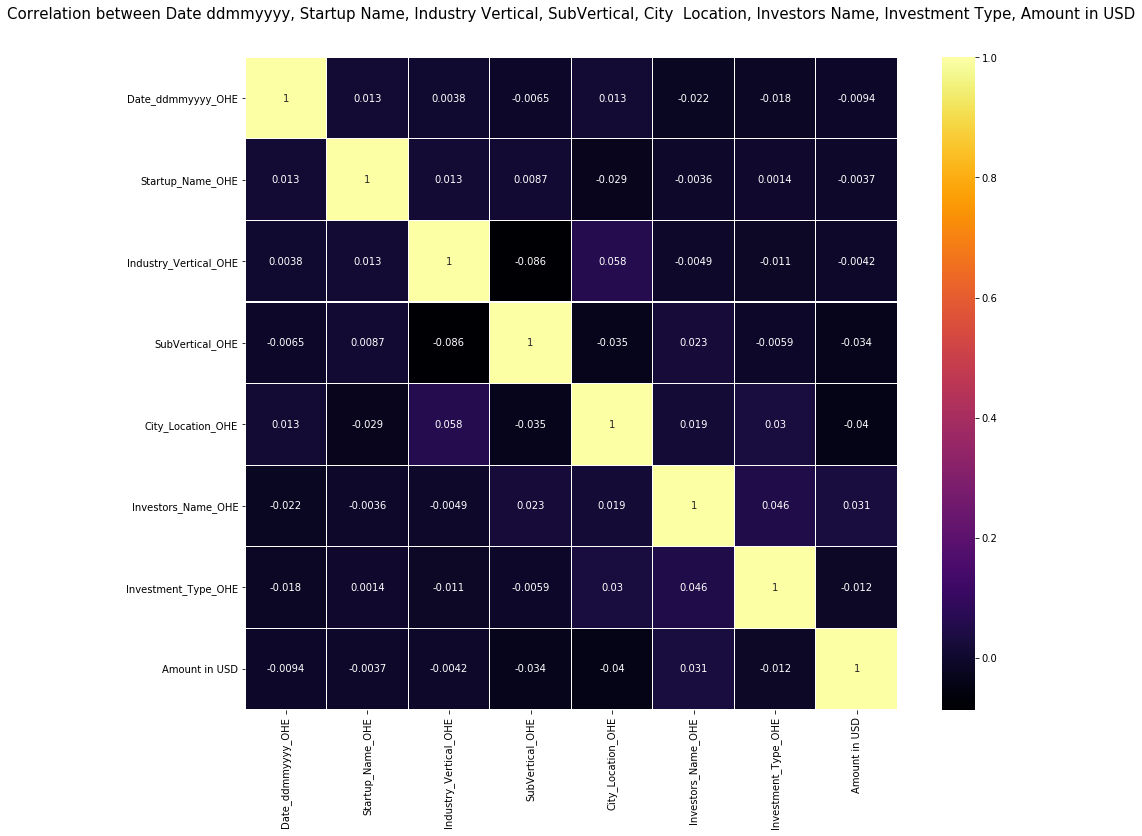

In [281]:
colormap = plt.cm.inferno
plt.figure(figsize = (16,12))
plt.title("Correlation between Date ddmmyyyy, Startup Name, Industry Vertical, SubVertical, City  Location, Investors Name, Investment Type, Amount in USD", y=1.05, size = 15)
sns.heatmap(correlation_DF.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)